In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def createArray(L):
    mat = np.random.randint(0,2,size=(L,L), dtype=int)
    mat[mat==0] = -1 
    return mat

In [16]:
def iterateTri(mat,T,calcE=False):
    # Metropolis algorithm for a triangular lattice
    """
    Parameters:
        mat: numpy array containing the current spin configuration
        T: Temperature for the simulation
        calcE: Flag to calculate and return the average spin energy for the final configuration.
    """
    L,_ = mat.shape
      
    order1 = np.arange(L)
    order2 = np.arange(L)
    np.random.shuffle(order1)
    np.random.shuffle(order2)
    
    #updateMat=mat
    avgE = 0.0
    for i in order1:
        for j in order2:
            spin_current = mat[i,j]
            spin_new = spin_current*(-1)
            neighbor_sum = (mat[(i+1)%L,j]+mat[(i-1)%L,j]+mat[i,(j+1)%L]+mat[i,(j-1)%L]+mat[(i+1)%L,(j+1)%L]+mat[(i-1)%L,(j-1)%L])
            E_current = -spin_current*neighbor_sum
            E_new = -spin_new*neighbor_sum
            E_diff = E_new - E_current
            if E_diff < 0:
                mat[i,j] = spin_new
            elif np.random.random()<= np.exp(-float(E_diff)/T):
                mat[i,j] = spin_new

    if calcE:        
        for i in order1:
            for j in range(0,L):
                spin_final = mat[i,j]
                E_final = -spin_final*(mat[i+1,j]+mat[i-1,j]+mat[i,j+1]+mat[i,j-1])
                avgE+=float(E_final)
    
        avgE/=float(L**2)                   
        return avgE
    

In [17]:
def simulateTri(mat,T,steps):
    #MC simulation for a triangular lattice, using the Wolff algorithm
    for step in range(steps):
        iterateTri(mat,T)

In [18]:
def generateSamples(T,L,steps,samples,dirPath):
    # Generate, label, and save configurations for a square lattice
    """
    Parameters:
        T: Temperature
        L: Linear lattice size
        steps: Number of simulation steps
        sample: Number of configuration steps
        dirPath: save location
    """
    for i in range(1,samples+1):
        mat = createArray(L)
        simulateTri(mat,T,steps)
        
        if T<2.27: # For a square lattice, the critical T is ~2.27
            category = "low"
        else:
            category = "high"
        
        path = os.path.join(dirPath,category)
        os.makedirs(path, exist_ok=True)
        np.save(os.path.join(path,f"{category}_{T:.2f}_{i}_"),mat)

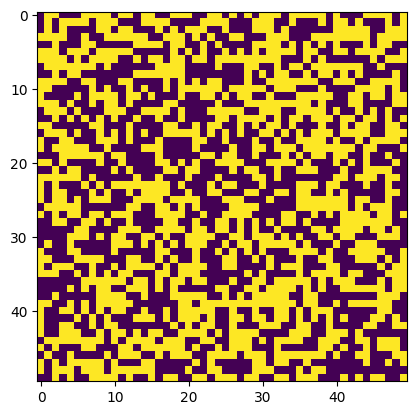

In [19]:
# Initial configuration of 50x50 Ising lattice
mat=createArray(50)
plt.imshow(mat)

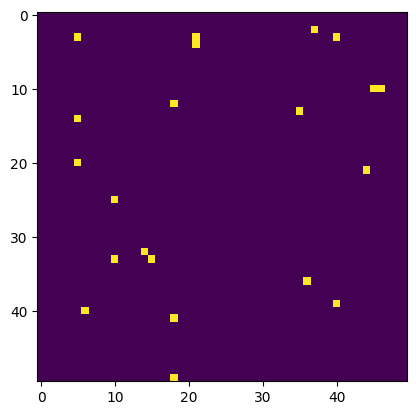

In [20]:
simulateTri(mat,2.3,3000)
plt.imshow(mat)

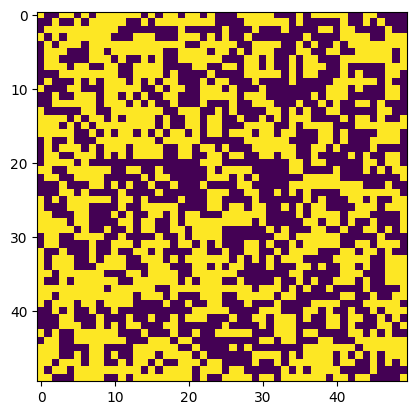

In [21]:
mat=createArray(50)
simulateTrif(mat,9.3,3000)
plt.imshow(mat)

In [ ]:
def generateSamplesTri(T,L,steps,samples,dirPath):
    # Generate, label, and save configurations for a triangular lattice
    for i in range(1,samples+1):
        mat = createArray(L)
        simulateTri(mat,T,steps)
        
        if T<3.65: # Critical T for a triangular lattice
            category = "low"
        else:
            category = "high"
        
        path = os.path.join(dirPath,category)
        os.makedirs(path, exist_ok=True)
        np.save(os.path.join(path,f"{category}_{T:.2f}_{i}_"),mat)